# Model de Regresión Lineal

In [4]:
from importacion_preprocesado import download_and_load_data, preprocesamiento


tamany_img = (128,128) # tamaño reducido para colab porque si no supera la ram
X, y = download_and_load_data(target_size=tamany_img)

X_train, X_val, X_test, y_train, y_val, y_test = preprocesamiento(X, y)

Dataset ya existe, solo se van a cargar las imágenes.
X shape: (4217, 128, 128, 3) y shape: (4217,)


Para hacer el modelo lineal tenemos que modificar el formato de nuestros datos, ahora mismo estan en un formato de 4 dimensiones, y la refresión lineal resuleve problemas de 2D. Por eso vamos a modificar los datos aplicando un flatten para que ahora este como un vector de caracteristicass y no las imagenes. Y tambien tenemos que cambiar la Y, dado que la tenemos como one-hot encoder ([0,0,1,0]), y tenemos que ponerla como una columna

In [5]:
def aplanamiento(X):
    X_flat = X.reshape(X.shape[0], -1)
    return X_flat

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

X_train_f = aplanamiento(X_train)
X_val_f = aplanamiento(X_val)
X_test_f = aplanamiento(X_test)

y_train_f = np.argmax(y_train, axis=1)
y_val_f = np.argmax(y_val, axis=1)
y_test_f = np.argmax(y_test, axis=1)

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_f, y_train_f)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
n_params = model.coef_.size + model.intercept_.size
print("Numero de parametros:", n_params)

Numero de parametros: 196612


In [ ]:
def evaluate(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="weighted")
    return acc, f1

acc_train, f1_train = evaluate(model, X_train_f, y_train_f)
acc_val, f1_val = evaluate(model, X_val_f, y_val_f)
acc_test, f1_test = evaluate(model, X_test_f, y_test_f)

Train F1: 0.9992091138654777, Val F1: 0.7907751473310584, Test F1: 0.7961243056247579


In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

datasets = {
    "Train": (X_train, y_train),
    "Val": (X_val, y_val),
    "Test": (X_test, y_test)
}

def evaluate(model, X, y):
    #Convertir a enteros
    y_true = np.argmax(y, axis=1)

    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    return acc, f1


def crear_df_metricas(resultados = []):
    nombres = ["Train", "Val", "Test"]
    results = {}
    for nombre, (acc, f1) in zip(nombres, resultados):
        results[nombre] = [acc, f1]
    
    df = pd.DataFrame(results, index=["Accuracy", "F1"])
    return df

df = crear_df_metricas(resultados=[[acc_train, f1_train], [acc_val, f1_val], [acc_test, f1_test]])
df


,Train,Val,Test
Accuracy,0.999209,0.792654,0.797393
F1,0.999209,0.790775,0.796124


In [14]:
import matplotlib.pyplot as plt

def plot_barra(metrica, titulo, color):

    plt.figure(figsize=(6,4))
    bars = plt.bar(metrica.index, metrica.values, color=color)
    plt.bar_label(bars)
    plt.title(f"{titulo}: Train vs Validation vs Test")
    plt.ylabel(titulo)
    plt.ylim(0,1)
    plt.grid(axis='y', linestyle='--')
    plt.show()


def plots_metricas(df):
    #Extraemos la fila
    accuracy = df.loc["Accuracy"]
    f1 = df.loc["F1"]

    #Grafico de Accuracy
    plot_barra(accuracy, titulo = "Accuracy", color="blue")

    #Grafico de 
    plot_barra(f1, titulo ="F1", color = "red")

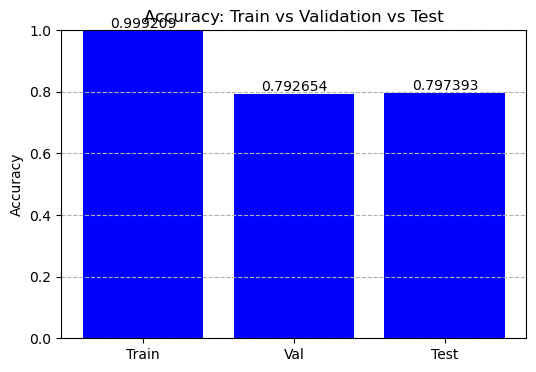

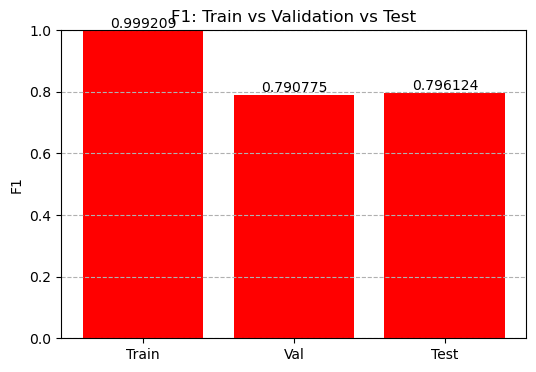

In [15]:
plots_metricas(df)

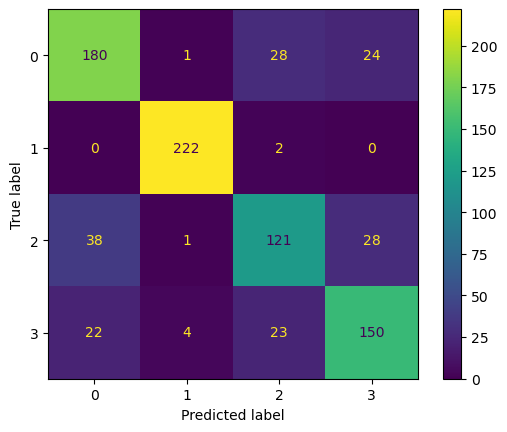

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_f)

cm = confusion_matrix(y_test_f, y_pred)
ConfusionMatrixDisplay(cm).plot()

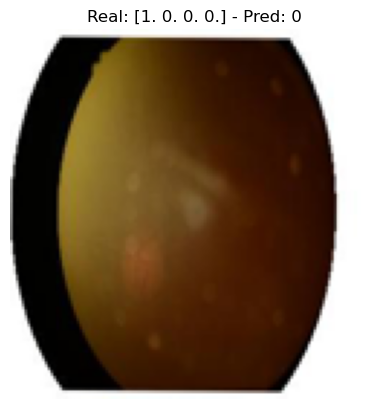

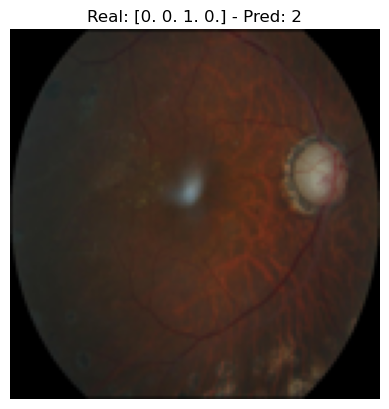

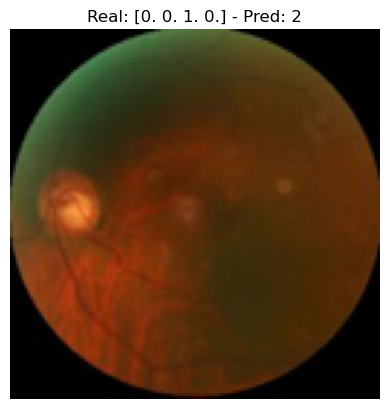

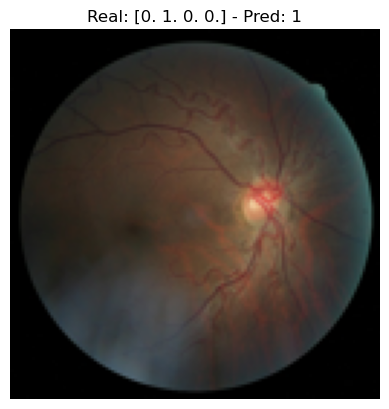

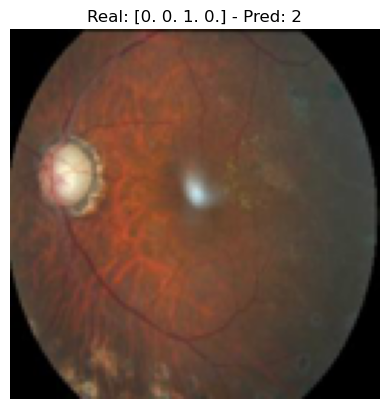

In [12]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X_test[i].reshape(128, 128, 3))
    plt.title(f"Real: {y_test[i]} - Pred: {y_pred[i]}")
    plt.axis('off')
    plt.show()